About Dataset 
Home Value Insights: A Beginner's Regression Dataset 
data source: https://www.kaggle.com/datasets/prokshitha/home-value-insights

Linear Regression

In [29]:
import pandas as pd
import numpy as np


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
%matplotlib inline

In [32]:
df = pd.read_csv("house_price_regression_dataset.csv")

In [33]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [86]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [87]:
df.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [88]:
df.nunique()

Square_Footage           894
Num_Bedrooms               5
Num_Bathrooms              3
Year_Built                73
Lot_Size                1000
Garage_Size                3
Neighborhood_Quality      10
House_Price             1000
dtype: int64

In [89]:
df.duplicated().sum()

0

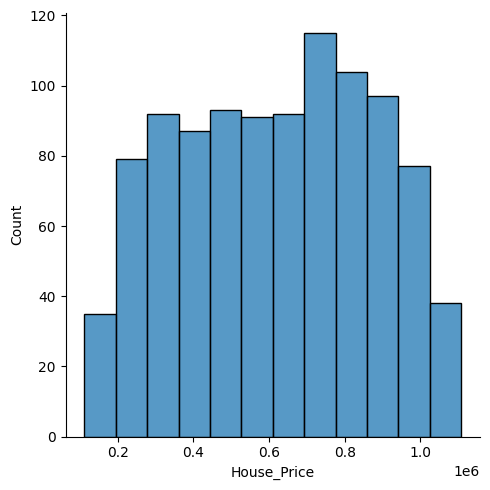

In [41]:
sns.displot(df['House_Price'])

<AxesSubplot: >

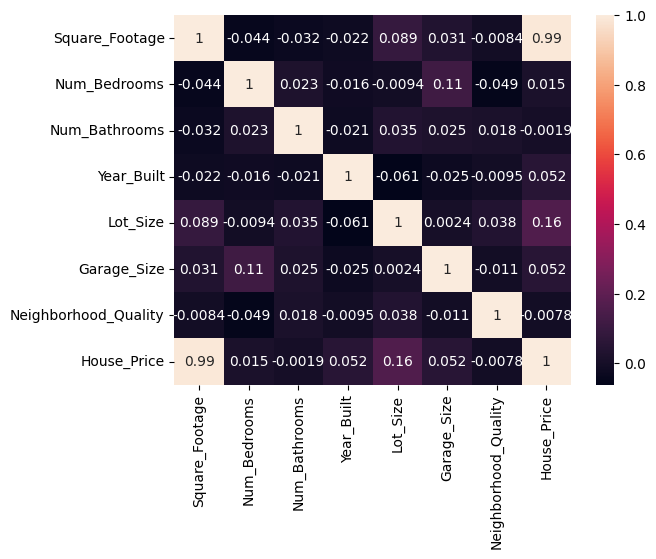

In [44]:
sns.heatmap(df.corr(),annot=True)

In [36]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [90]:
features = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]
features

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8
...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10
996,3179,1,2,1999,2.977123,1,10
997,2606,4,2,1962,4.055067,0,2
998,4723,5,2,1950,1.930921,0,7


In [91]:
target = df[['House_Price']]
target

,House_Price
0,2.623829e+05
1,9.852609e+05
2,7.779774e+05
3,2.296989e+05
4,1.041741e+06
...,...
995,7.014940e+05
996,6.837232e+05
997,5.720240e+05
998,9.648653e+05


In [45]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.33,random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [53]:
model.fit(X_train,y_train)

LinearRegression()

Predictions

In [62]:
predictions = model.predict(X_test)

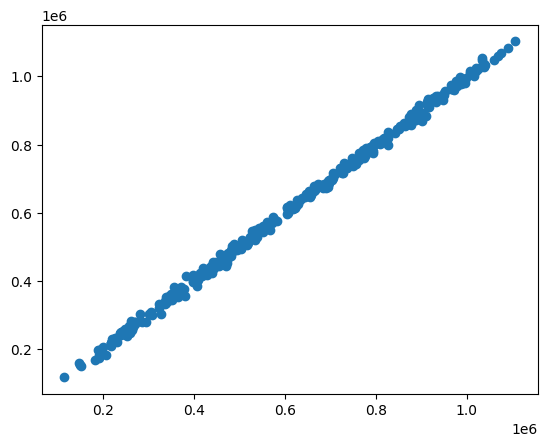

In [71]:
plt.scatter(y_test,predictions)

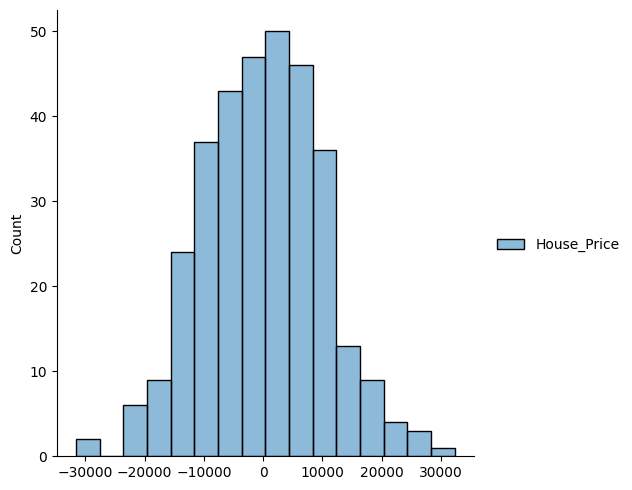

In [73]:
sns.displot(y_test-predictions)

Evaluation

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [79]:
mae = mean_absolute_error(y_test,predictions)
mae

8042.4589767722455

In [84]:
mse = mean_squared_error(y_test,predictions)
mse

100639932.87658754

In [85]:
rmse = np.sqrt(mse)
rmse

10031.94561770485

In [100]:
r2_score = r2_score(y_test,predictions)
r2_score

0.9984347015248385